In [1]:
import open3d as o3d
import numpy as np

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
pcd = o3d.io.read_point_cloud("sample.xyz")

In [3]:
o3d.visualization.draw_geometries([pcd], window_name="Point Cloud")

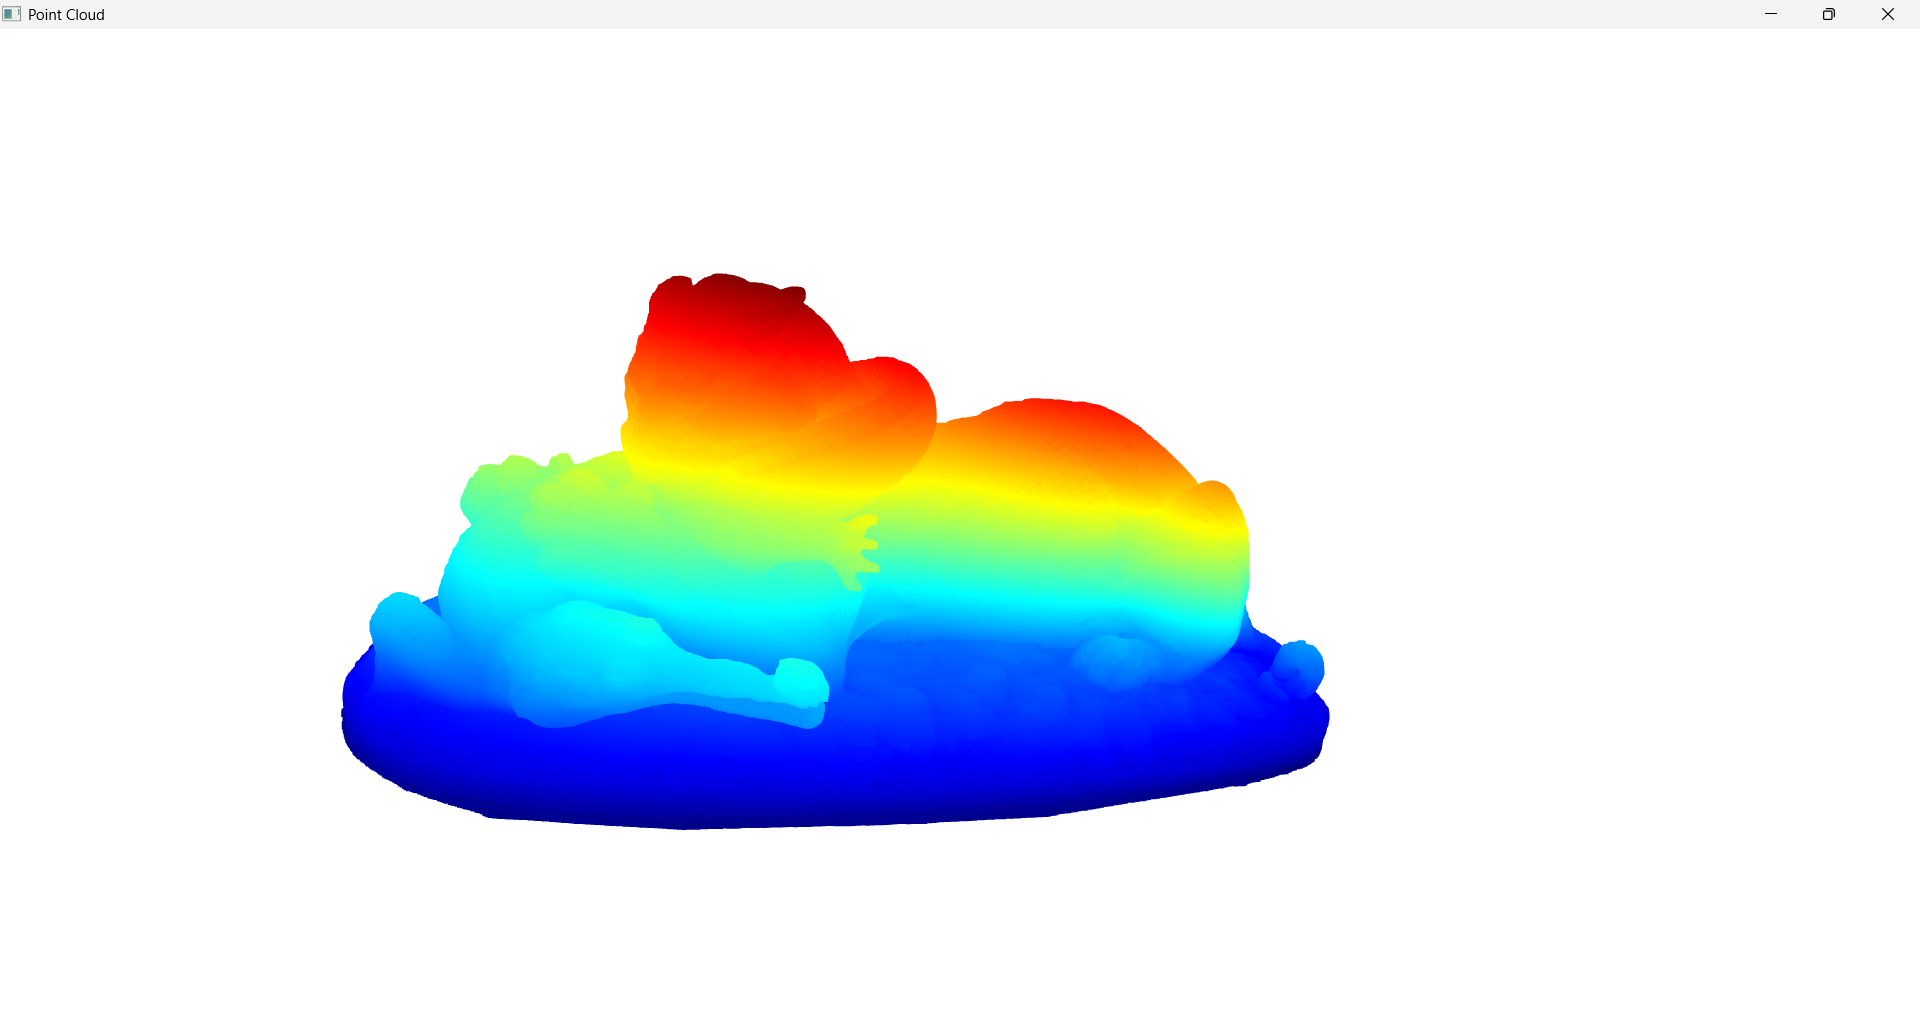

In [4]:
# Estimate normals
pcd.estimate_normals(search_param=o3d.geometry.KDTreeSearchParamHybrid(radius=0.1, max_nn=30))
# Orient normals consistently
# The orientation of these normals can be inconsistent, meaning that some 
# normals might point inward while others point outward. This inconsistency can
# cause issues in surface reconstruction algorithms, such as Poisson reconstruction
pcd.orient_normals_consistent_tangent_plane(100)

In [5]:
mesh, densities = o3d.geometry.TriangleMesh.create_from_point_cloud_poisson(pcd, depth=9)

In [ ]:
o3d.visualization.draw_plotly([mesh])

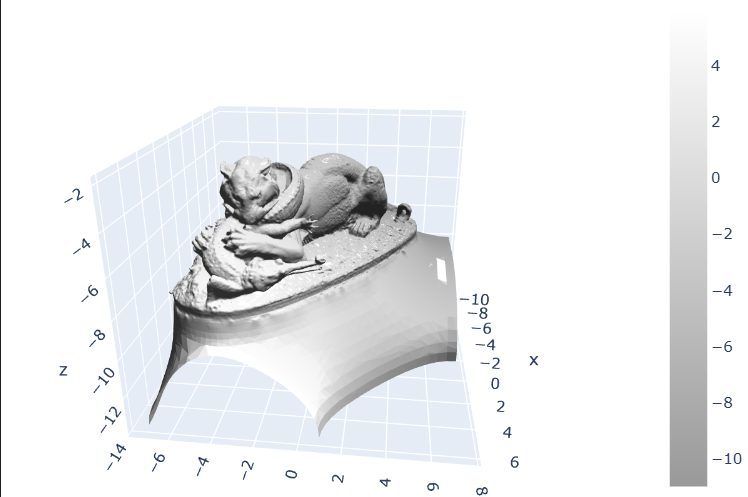

In [7]:
# Convert densities to a numpy array for thresholding
densities = np.asarray(densities)

# Create a mask for vertices to remove low-density points
vertices_to_remove = densities < np.quantile(densities, 0.05)
mesh.remove_vertices_by_mask(vertices_to_remove)

In [ ]:
o3d.visualization.draw_plotly([mesh])

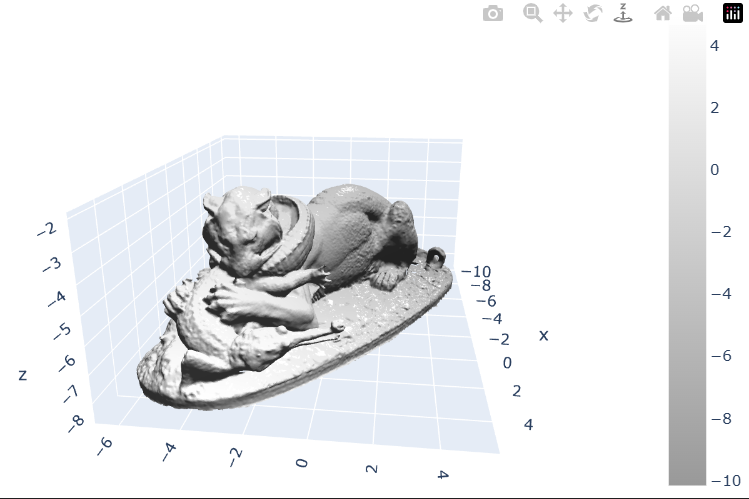